**Assignment 03**: Neural Networks

**Name**: D.M.S.P.Dissanayaka  
**Index Number**: 210141U  
**GitHub**: [Link](https://github.com/SahanDissanayaka/Image-Processing-and-Computer-Vision/blob/main/Assignments/Assignment3/assignment3.ipynb)

**Date**: 12.11.2024

 <p style="text-align: center; font-size: 20px;">
Problem 01
</p>

Files already downloaded and verified
Files already downloaded and verified
Epoch 1 / 10, Loss: 2.3025855581760406
Epoch 2 / 10, Loss: 2.3025855031013487
Epoch 3 / 10, Loss: 2.302585457086563
Epoch 4 / 10, Loss: 2.302585424900055
Epoch 5 / 10, Loss: 2.3025853805541994
Epoch 6 / 10, Loss: 2.3025853464603423
Epoch 7 / 10, Loss: 2.302585322380066
Epoch 8 / 10, Loss: 2.3025853040218354
Epoch 9 / 10, Loss: 2.3025852789878845
Epoch 10 / 10, Loss: 2.3025852558612825


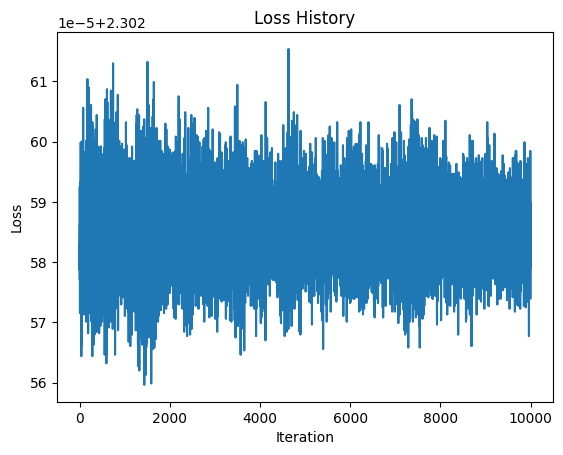

Training accuracy: 10.00%
Test accuracy: 10.00%


In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Model parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100  # Hidden layer size
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5
# Initialize weights and biases
w1 = torch.randn(Din, H) * std  # Input to hidden layer weights
b1 = torch.zeros(H)  # Hidden layer bias
w2 = torch.randn(H, K) * std  # Hidden to output layer weights
b2 = torch.zeros(K)  # Output layer bias

# Hyperparameters
iterations = 10
lr = 2e-6
lr_decay = 0.9
reg = 0  # Regularization
loss_history = []

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

# Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        hidden_layer = sigmoid(x_train.mm(w1) + b1)  # Hidden layer activation
        logits = hidden_layer.mm(w2) + b2  # Output layer logits

        # Cross-entropy loss with regularization
        loss = nn.functional.cross_entropy(logits, labels) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        # Compute gradients for output layer
        dy_pred = nn.functional.softmax(logits, dim=1)  # Softmax predictions
        dy_pred[range(Ntr), labels] -= 1  # Compute gradient wrt logits
        dy_pred /= Ntr  # Normalize gradient by batch size

        dw2 = hidden_layer.t().mm(dy_pred) + reg * w2
        db2 = dy_pred.sum(dim=0)

        # Compute gradients for hidden layer
        dhidden = dy_pred.mm(w2.t()) * (hidden_layer * (1 - hidden_layer))
        dw1 = x_train.t().mm(dhidden) + reg * w1
        db1 = dhidden.sum(dim=0)

        # Parameter update
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1} / {iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        hidden_layer = sigmoid(x_train.mm(w1) + b1)
        logits_train = hidden_layer.mm(w2) + b2
        predicted_train = torch.argmax(logits_train, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        hidden_layer = sigmoid(x_test.mm(w1) + b1)
        logits_test = hidden_layer.mm(w2) + b2
        predicted_test = torch.argmax(logits_test, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()
test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


 <p style="text-align: center; font-size: 20px;">
Problem 02
</p>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define the LeNet-5 model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2) # output: 6x28x28
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)               # output: 6x14x14
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)                      # output: 16x10x10
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)                # output: 16x5x5
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)  # Flatten
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)          # No activation here; CrossEntropyLoss applies softmax
        return x


In [3]:
# Transformations for MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [4]:
# Initialize model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
# Training and evaluation loop
num_epochs = 10
for epoch in range(num_epochs):
    # Training
    model.train()
    correct_train = 0
    total_train = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        _, predicted = outputs.max(1)
        correct_train += predicted.eq(labels).sum().item()
        total_train += labels.size(0)
    
    train_accuracy = 100 * correct_train / total_train

    # Evaluation
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            correct_test += predicted.eq(labels).sum().item()
            total_test += labels.size(0)
    
    test_accuracy = 100 * correct_test / total_test
    print(f"Epoch [{epoch + 1}/{num_epochs}], Training Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")

Epoch [1/10], Training Accuracy: 90.54%, Test Accuracy: 97.41%
Epoch [2/10], Training Accuracy: 97.47%, Test Accuracy: 98.44%
Epoch [3/10], Training Accuracy: 98.24%, Test Accuracy: 98.05%
Epoch [4/10], Training Accuracy: 98.64%, Test Accuracy: 98.93%
Epoch [5/10], Training Accuracy: 98.80%, Test Accuracy: 98.80%
Epoch [6/10], Training Accuracy: 99.01%, Test Accuracy: 98.78%
Epoch [7/10], Training Accuracy: 99.15%, Test Accuracy: 99.07%
Epoch [8/10], Training Accuracy: 99.24%, Test Accuracy: 99.13%
Epoch [9/10], Training Accuracy: 99.39%, Test Accuracy: 99.17%
Epoch [10/10], Training Accuracy: 99.44%, Test Accuracy: 99.02%


 <p style="text-align: center; font-size: 20px;">
Problem 03
</p>

 <p style="text-align: center; font-size: 20px;">
Setup
</p>

In [6]:
import torch
import torch.nn as nn
from torchvision import datasets, models, transforms
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import os
import copy

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'hymenoptera'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                              shuffle=True, num_workers=4)
               for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

<p style="text-align: center; font-size: 20px;">
(a) Fine Tuning the Model
</p>

In [7]:
from torchvision.models import resnet18, ResNet18_Weights

# Load ResNet18 with the new weights parameter
model_ft = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)  # Or use `weights=ResNet18_Weights.DEFAULT`
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)  # Modify the final layer for 2 classes
model_ft = model_ft.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Define the learning rate scheduler
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)


In [8]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Update the learning rate scheduler after each training epoch
            if phase == 'train':
                scheduler.step()

            # Save the best model weights based on validation accuracy
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    # Load the best model weights
    model.load_state_dict(best_model_wts)
    return model

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)


Epoch 0/24
----------
train Loss: 0.6644 Acc: 0.6434
val Loss: 0.2858 Acc: 0.8889
Epoch 1/24
----------
train Loss: 0.4725 Acc: 0.8197
val Loss: 0.2779 Acc: 0.8627
Epoch 2/24
----------
train Loss: 0.3917 Acc: 0.8361
val Loss: 0.2002 Acc: 0.9150
Epoch 3/24
----------
train Loss: 0.5620 Acc: 0.7623
val Loss: 0.3424 Acc: 0.8693
Epoch 4/24
----------
train Loss: 0.4731 Acc: 0.8279
val Loss: 0.3485 Acc: 0.8693
Epoch 5/24
----------
train Loss: 0.6799 Acc: 0.7787
val Loss: 0.4780 Acc: 0.8366
Epoch 6/24
----------
train Loss: 0.6104 Acc: 0.7951
val Loss: 0.2822 Acc: 0.8824
Epoch 7/24
----------
train Loss: 0.4045 Acc: 0.8361
val Loss: 0.2309 Acc: 0.9216
Epoch 8/24
----------
train Loss: 0.3078 Acc: 0.8770
val Loss: 0.1929 Acc: 0.9412
Epoch 9/24
----------
train Loss: 0.3549 Acc: 0.8525
val Loss: 0.2410 Acc: 0.9150
Epoch 10/24
----------
train Loss: 0.3929 Acc: 0.8320
val Loss: 0.1964 Acc: 0.9412
Epoch 11/24
----------
train Loss: 0.3134 Acc: 0.8811
val Loss: 0.2335 Acc: 0.9150
Epoch 12/24
--

<p style="text-align: center; font-size: 20px;">
(b) Using the Network as a Feature Extractor
</p>

In [10]:
# Load ResNet18 with the updated weights parameter
model_conv = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)  # Or use `weights=ResNet18_Weights.DEFAULT`

# Freeze all layers
for param in model_conv.parameters():
    param.requires_grad = False

# Modify the final layer to have 2 output features (for 2 classes: ants and bees)
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)
model_conv = model_conv.to(device)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define an optimizer that only updates the parameters of the final layer
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Define the learning rate scheduler
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

# Train the model
model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=25)


Epoch 0/24
----------
train Loss: 0.6949 Acc: 0.6066
val Loss: 0.4392 Acc: 0.8105
Epoch 1/24
----------
train Loss: 0.5755 Acc: 0.7254
val Loss: 0.1767 Acc: 0.9542
Epoch 2/24
----------
train Loss: 0.4413 Acc: 0.8238
val Loss: 0.2484 Acc: 0.9150
Epoch 3/24
----------
train Loss: 0.4381 Acc: 0.8033
val Loss: 0.2091 Acc: 0.9477
Epoch 4/24
----------
train Loss: 0.4643 Acc: 0.7787
val Loss: 0.2752 Acc: 0.8889
Epoch 5/24
----------
train Loss: 0.4913 Acc: 0.8033
val Loss: 0.2047 Acc: 0.9346
Epoch 6/24
----------
train Loss: 0.4014 Acc: 0.8074
val Loss: 0.2388 Acc: 0.9216
Epoch 7/24
----------
train Loss: 0.3477 Acc: 0.8525
val Loss: 0.1879 Acc: 0.9608
Epoch 8/24
----------
train Loss: 0.3233 Acc: 0.8484
val Loss: 0.1862 Acc: 0.9542
Epoch 9/24
----------
train Loss: 0.3153 Acc: 0.8443
val Loss: 0.1866 Acc: 0.9608
Epoch 10/24
----------
train Loss: 0.4349 Acc: 0.8238
val Loss: 0.2234 Acc: 0.9216
Epoch 11/24
----------
train Loss: 0.3121 Acc: 0.8566
val Loss: 0.1846 Acc: 0.9608
Epoch 12/24
--

<p style="text-align: center; font-size: 20px;">
Reporting the Results
</p>

In [11]:
def evaluate_model(model):
    model.eval()
    corrects = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloaders['val']:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            corrects += torch.sum(preds == labels)
            total += labels.size(0)

    accuracy = corrects.double() / total
    print(f'Validation Accuracy: {accuracy:.4f}')

print("Fine-tuning Results:")
evaluate_model(model_ft)

print("\nFeature Extraction Results:")
evaluate_model(model_conv)

Fine-tuning Results:
Validation Accuracy: 0.9542

Feature Extraction Results:
Validation Accuracy: 0.9608
